In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
from math import exp
from collections import defaultdict
import matplotlib.patches as patches


In [3]:
x = np.array([0.1000, 0.6000, 1.1000, 1.6000, 2.1000, 2.6000, 3.1000, 3.6000, 4.1000, 4.6000, 5.1000, 5.6000, 6.1000, 6.6000, 7.1000, 7.6000, 8.1000, 8.6000, 9.1000, 9.6000])
y = np.array([40.9415, 25.0093, 15.6647, 10.4142, 7.7452, 6.7403, 6.8431, 7.7162, 9.1548, 11.0348, 13.2808, 15.8473, 18.7065, 21.8415, 25.2423, 28.9026, 32.8187, 36.9883, 41.4101, 46.0831])

<h2> Scatter data points

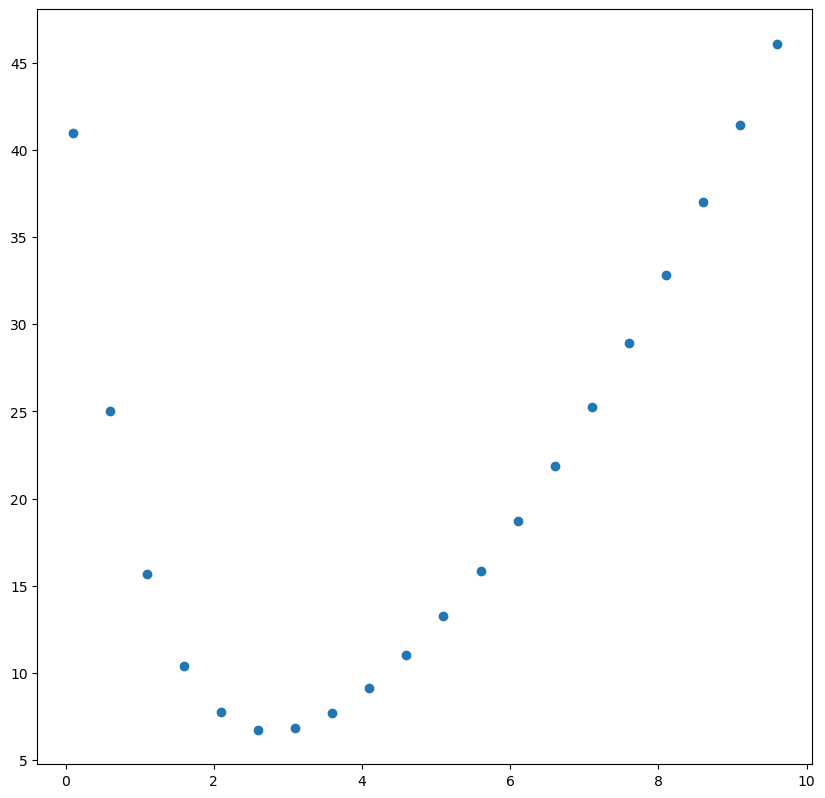

In [4]:
plt.figure(dpi=100,  figsize=(10, 10))
plt.scatter(x, y)
plt.show()

<h2> Fitting functions

$$y = a e^{c(x+b)} + d x$$

In [5]:
def func(k):
    a, b, c, d = k
    y = a*np.exp(c*(x+b)) + d*x
    return y

$$y = A e^{cx} + d x$$

In [6]:
def func1(k):
    A, c, d = k
    y = A*np.exp(c*x) + d*x
    return y

$$y = a e^{bx} + c x^2$$

In [7]:
def func2(k):
    a, b, c = k
    y = a*np.exp(b*x) + c*np.power(x,2)
    return y

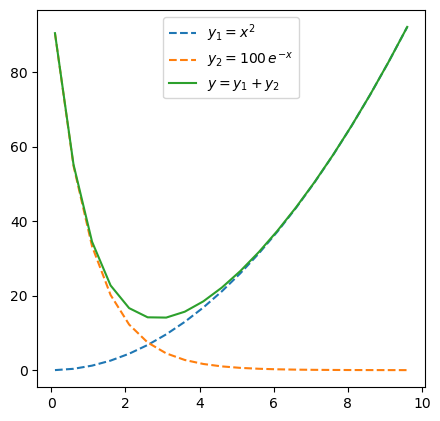

In [8]:
y1 = np.power(x,2)
y2 = 100*np.exp(-x)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(x, y1, linestyle='--', label = '$y_1 = x^2$')
plt.plot(x, y2, linestyle='--', label = '$y_2 = 100\,e^{-x}$')
plt.plot(x, y1+y2, label = '$y = y_1 + y_2$')

plt.legend(prop={'size': 10})

plt.show()

$$y = a e^{bx} + \frac{c}{x}$$

In [9]:
def func3(k):
    a, b, c = k
    y = a*np.exp(b*x) + c*np.power(x,-1)
    return y

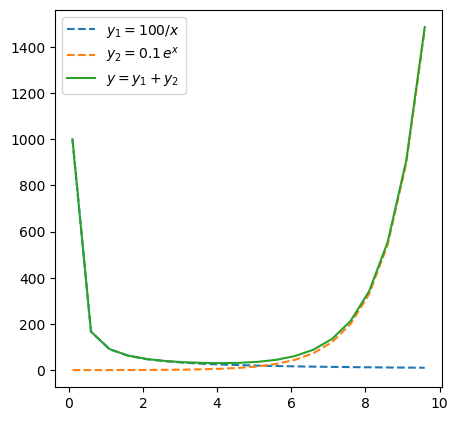

In [10]:
y1 = np.power(x,-1)*100
y2 = np.exp(x)*.1

plt.figure(figsize=(5,5), dpi=100)
plt.plot(x, y1, linestyle='--', label = '$y_1 = 100/x$')
plt.plot(x, y2, linestyle='--', label = '$y_2 = 0.1\,e^{x}$')
plt.plot(x, y1+y2, label = '$y = y_1 + y_2$')
plt.legend(prop={'size': 10})

plt.show()

$$y = a e^{bx} + c x^d$$

In [11]:
def func4(k):
    a, b, c, d = k
    y = a*np.exp(b*x) + c*np.power(x, d)
    return y

<h3> MSE Error </h3>
\begin{equation}
    \mathcal{L} = (y-f(k,x))^2
\end{equation}
where k is the parameter vector

In [12]:
def loss(k, func):
    return np.sum(np.square(y-func(k)))

<h2>Fitting curve through error minimization

<h3> Variable values</h3>

Change the following values to see the variation of the error.
1. function = (func, func1, func2, func3, func4) 
    - The fiting function. Choose between one of the options above
2. t = (int)
    - The number of initial points chosen randomly (between -10 and 10)
3. d = (3,  4)
    - Dimension of the parameter vector.
4. alg_list = ('SQP', 'BFGS', 'Nelder-Mead')
    - Chose the algorithm from the set of algorithms 'scipy.optimize.minimize' supports. Find list below.
5. verbose = True/ False
    - Print intermediate output.

In [78]:
function = func3
t = 100    # Chose number of random  initial points
d = 4    # parameter size (depeinding on function 3 or 4)

alg_list=['SLSQP', 'BFGS', 'Nelder-Mead']

verbose = False    # Display intermediate output (True/False)

In [79]:
# Error check

try:
    k0 = np.random.randn(d)
    function(k0)
except Exception as e:
    d_new = 4 if d==3 else 3
    print("Error: d = %d is incorrect. Changing value to %d"%(d,d_new))
    print(e)
    d = d_new
    k0 = np.random.randn(d)
    function(k0)
    

Error: d = 4 is incorrect. Changing value to 3
too many values to unpack (expected 3)


In [80]:
# ALGORITHM LIST
"""
‘Nelder-Mead’
‘Powell’ 
‘CG’ 
‘BFGS’ 
‘Newton-CG’     # Requires Jacobian. Cannot be used here
‘L-BFGS-B’ 
‘TNC’
‘COBYLA’
‘SLSQP’
‘trust-constr’
‘dogleg’ 
‘trust-ncg’
‘trust-exact’
‘trust-krylov’
"""

'\n‘Nelder-Mead’\n‘Powell’ \n‘CG’ \n‘BFGS’ \n‘Newton-CG’     # Requires Jacobian. Cannot be used here\n‘L-BFGS-B’ \n‘TNC’\n‘COBYLA’\n‘SLSQP’\n‘trust-constr’\n‘dogleg’ \n‘trust-ncg’\n‘trust-exact’\n‘trust-krylov’\n'

<h3>Inintialize initial points

In [81]:
# Generate 100 initial points
k_ = (np.random.rand(t, d) - .5) * 20
print("Initial points size = ", k_.shape)

# saves algo information
res_ = defaultdict(list)
# print(res_)

# Best solution of each algo (Low error and iterations)
best_ = {}
best_ind = {}

# Best solution from all algorithms
best = None


Initial points size =  (100, 3)


In [82]:
# Option
opts = {'disp': verbose}
# opts = {'xatol': 1e-8, 'disp': verbose}

# Error
error = lambda k: loss(k, function)

In [83]:

for alg in alg_list:
    best = None
    ind = 0
    for i in range(t):
        k0 = k_[i, :]
        res = minimize(error, k0, method=alg, options=opts)
        
        if not np.isnan(res.fun):
            best = res if best is None else best
            if res.fun - best.fun < .0001:
                if abs(res.fun - best.fun) > .0001 or res.nit < best.nit:
                    best = res
                    ind = i

#             print(alg, i, res.fun, best.fun, res.fun - best.fun)

        res_[alg].append(res)
        
    best_[alg] = best
    best_ind[alg] = ind


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\scipy\optimize\slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: i

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:69

<h3> Compare </h3>
    View comparative values of all other algorithms

In [84]:
best = None
best_alg = None

for alg in best_:
    best_alg = alg if best is None else best_alg
    best = best_[alg] if best is None else best
    # a, b, c, d = best.x
    # A = a*np.exp(c*b)
    # print(A)
    if best_[alg].fun - best.fun < .0001:
        if abs(best_[alg].fun - best.fun) > .0001 or best_[alg].nit < best.nit:
            best = best_[alg]
            best_alg = alg
    
    print("Best solution - %s:"%(alg))
    print(best_[alg])
    print()


k_ans = best.x

print()
print("Best algorithm = %s"%best_alg)
print("Final parameter value = ",  end=' ')
print(k_ans)

# print(k_[best_ind['SLSQP'], :])

Best solution - SLSQP:
     fun: 301.69826452770116
     jac: array([0.00124359, 0.03089905, 0.00052261])
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([3.78280394, 0.26083357, 3.97191266])

Best solution - BFGS:
      fun: 301.6982645255716
 hess_inv: array([[ 1.97651358e-02, -6.24669292e-04, -3.23194537e-03],
       [-6.24669292e-04,  2.05524555e-05,  9.94169589e-05],
       [-3.23194537e-03,  9.94169589e-05,  5.29141445e-03]])
      jac: array([3.81469727e-06, 3.81469727e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 12
     njev: 21
   status: 0
  success: True
        x: array([3.78280031, 0.26083366, 3.97191086])

Best solution - Nelder-Mead:
 final_simplex: (array([[3.78279738, 0.26083307, 3.97189522],
       [3.78275058, 0.26083589, 3.97193133],
       [3.78276779, 0.26083452, 3.97184587],
       [3.7827035 , 0.26083569, 3.9719625 ]]), array(

No handles with labels found to put in legend.


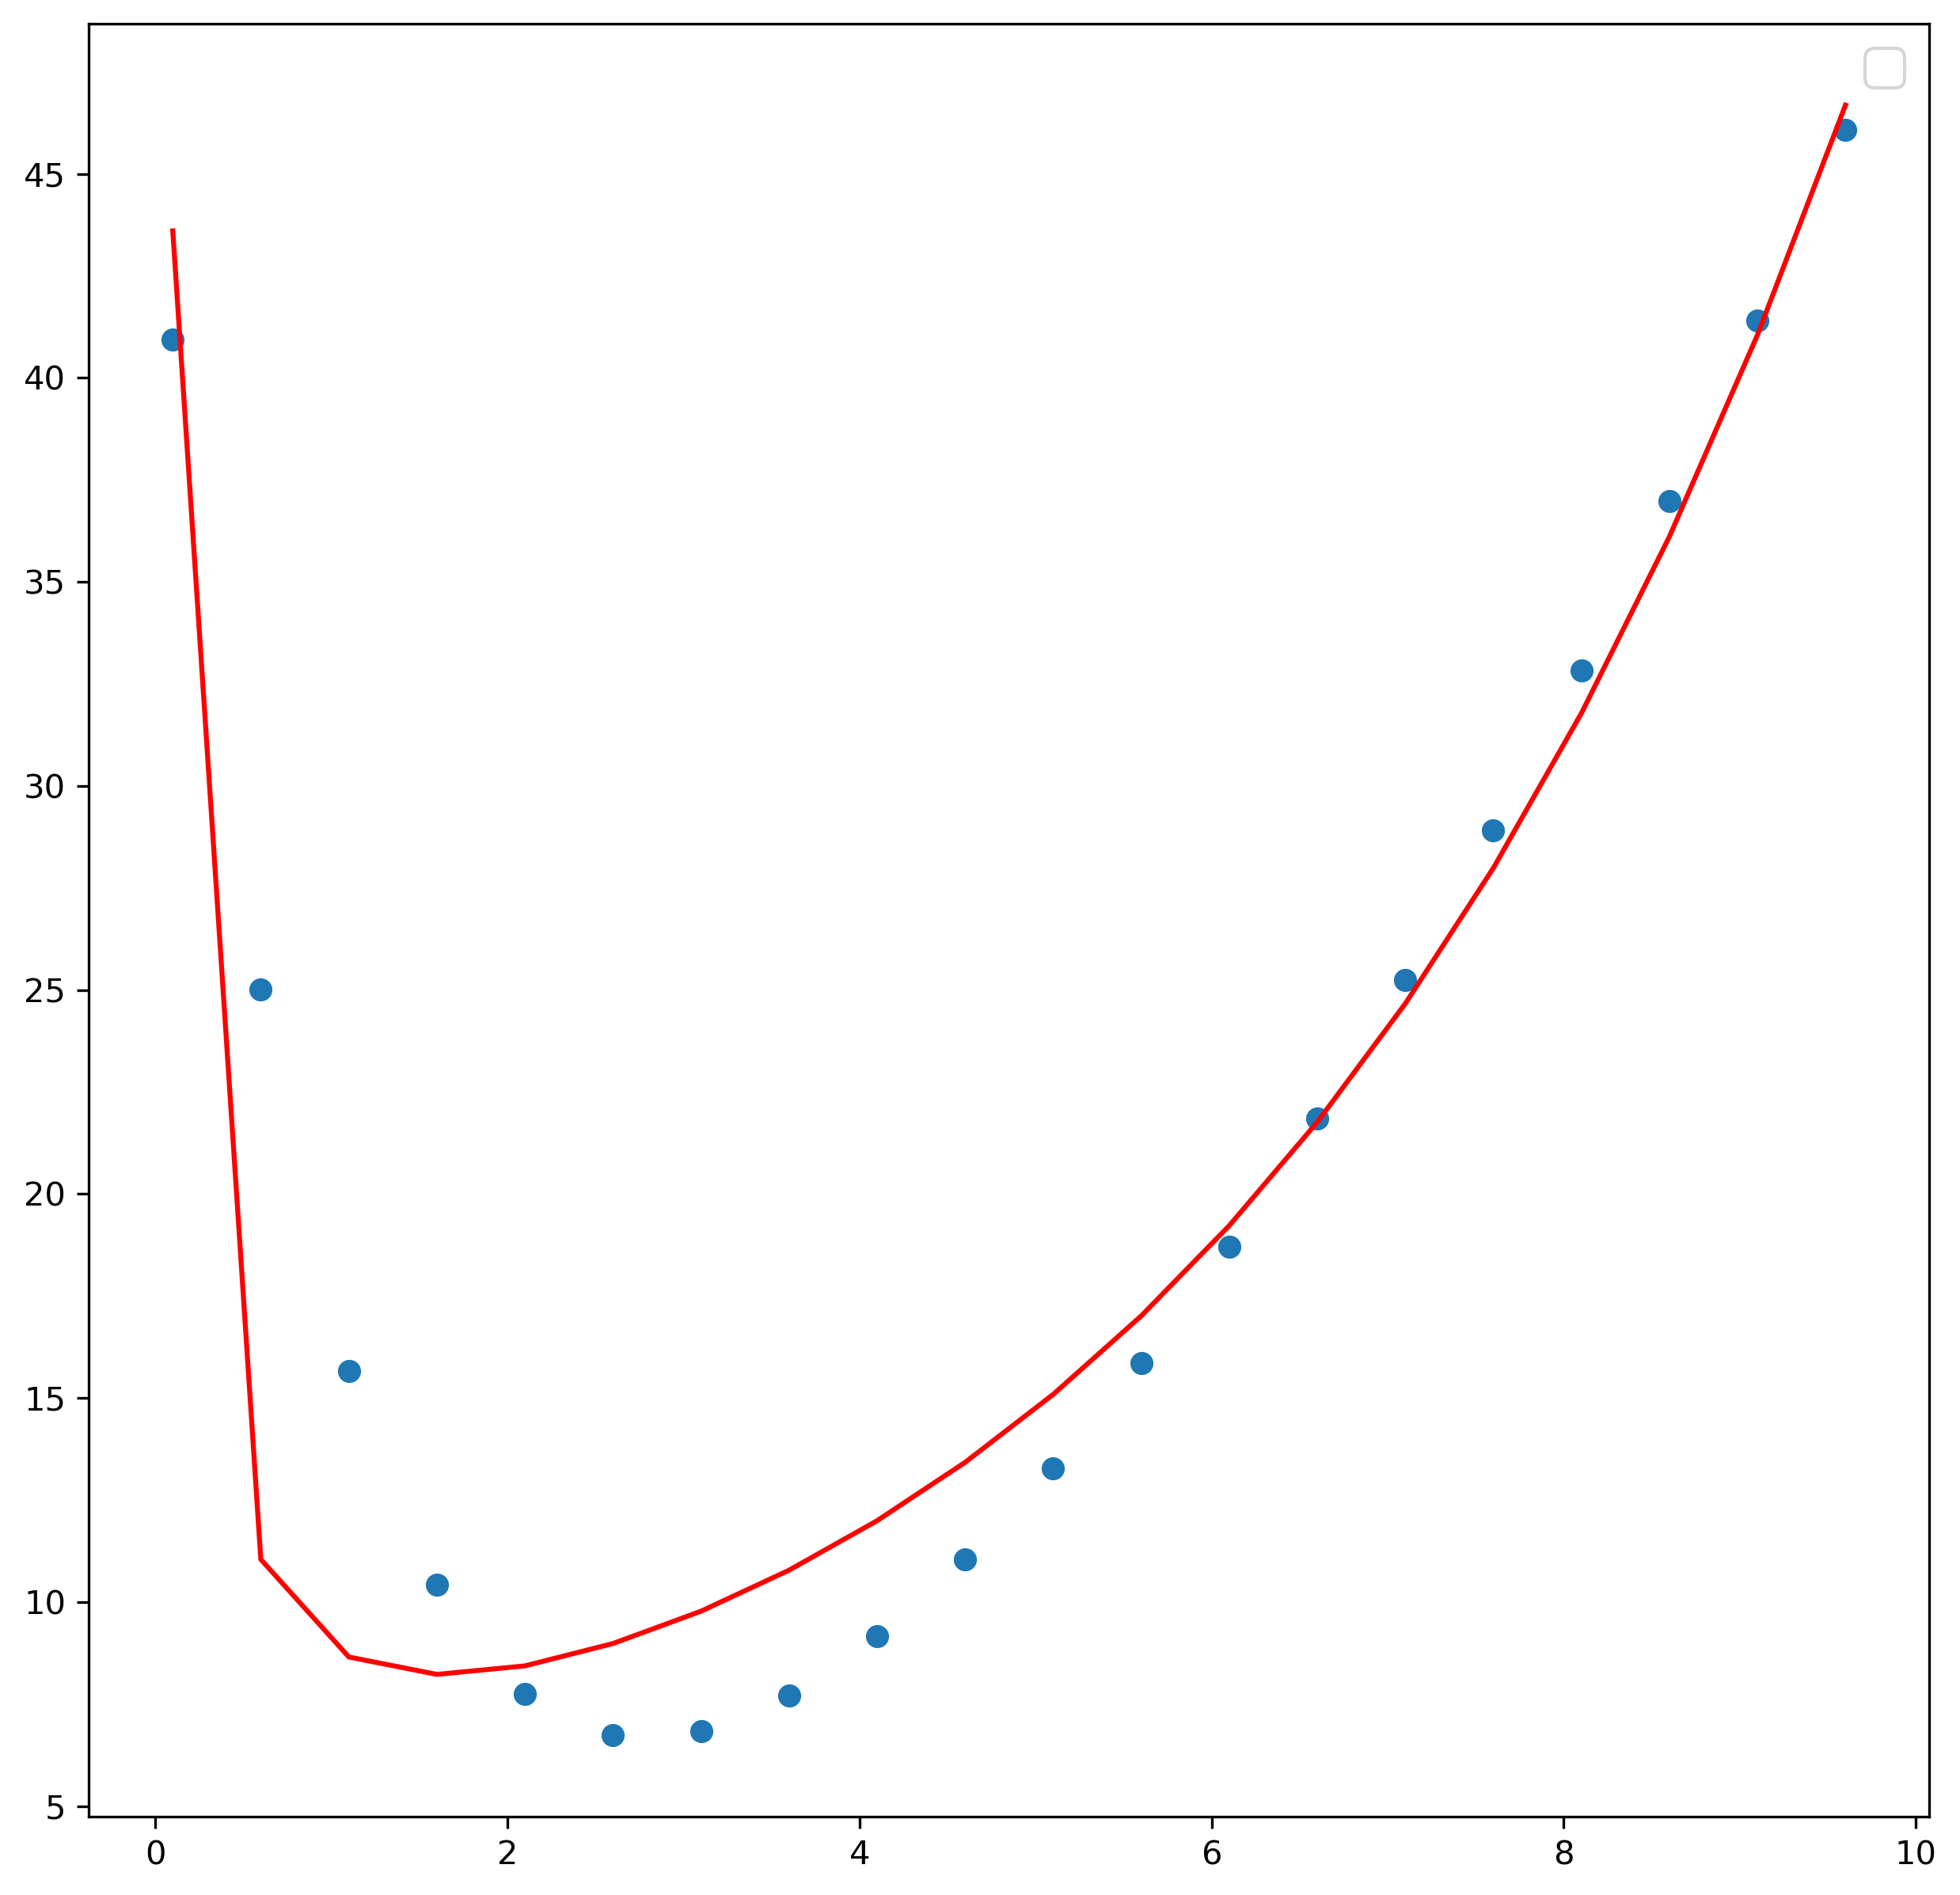

In [85]:
label  = None

plt.figure(dpi=300, figsize=(10,10))

plt.scatter(x, y)
plt.plot(x, function(k_ans),'r', label=label)
plt.legend(prop={'size': 15})

plt.show()

<h2> Redo expermients with callback to observe error

In [86]:
def callback_fun(xk):
    memory[ALGO].append(xk)

In [87]:
memory = defaultdict(list)


for alg in best_ind:
    ALGO = alg
    ind = best_ind[alg]
    k0 = k_[ind, :]
    print(alg, k0)
    
    res = minimize(error, k0, method=alg, options=opts, callback =callback_fun)
    print (ALGO)
    print(res)


SLSQP [ 5.02618921 -0.03158326  0.41575531]
SLSQP
     fun: 301.69826452770116
     jac: array([0.00124359, 0.03089905, 0.00052261])
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([3.78280394, 0.26083357, 3.97191266])
BFGS [ 5.02618921 -0.03158326  0.41575531]
BFGS
      fun: 301.6982645255716
 hess_inv: array([[ 1.97651358e-02, -6.24669292e-04, -3.23194537e-03],
       [-6.24669292e-04,  2.05524555e-05,  9.94169589e-05],
       [-3.23194537e-03,  9.94169589e-05,  5.29141445e-03]])
      jac: array([3.81469727e-06, 3.81469727e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 12
     njev: 21
   status: 0
  success: True
        x: array([3.78280031, 0.26083366, 3.97191086])
Nelder-Mead [1.67334581 0.29651692 5.65299733]
Nelder-Mead
 final_simplex: (array([[3.78279738, 0.26083307, 3.97189522],
       [3.78275058, 0.26083589, 3.97193133],
       [3.7827677

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


In [65]:
err_ = defaultdict(list)

for alg in memory:
    print (alg, len(memory[alg]))
    
    for xk in memory[alg]:
        err_[alg].append(error(xk))
        

SLSQP 11
BFGS 11
Nelder-Mead 114


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


In [66]:
for alg in err_:
    for i in range(len(err_[alg])):
        print (i, err_[alg][i])

print()

0 1.3291115946444202e+146
1 4.8996063878222914e+148
2 inf
3 inf
4 1151.4306307930601
5 468.3682340747623
6 450.74108751743285
7 450.647571250446
8 450.64231875573734
9 450.64223065546906
10 450.64223065546906
0 29695.6701628125
1 1353.677767292354
2 475.5034472778799
3 474.10155441128
4 462.0322491519107
5 450.8070334737163
6 450.64916777604697
7 450.64223876601017
8 450.64223036479024
9 450.642230348089
10 450.6422303480638
0 3108.1272512280216
1 3081.203454479463
2 3081.203454479463
3 3028.0220719206877
4 2990.9750601151395
5 2990.9750601151395
6 2949.3808003078116
7 2903.9519058586047
8 2779.9805957967496
9 2640.226003607673
10 2635.682292545962
11 2600.3298358617285
12 2465.7718667804033
13 2447.301701897715
14 2407.565362818612
15 2407.565362818612
16 2367.502594830952
17 2367.502594830952
18 2367.502594830952
19 2364.1108766905604
20 2364.1108766905604
21 2338.4171181093006
22 2338.4171181093006
23 2338.4171181093006
24 2307.95746296307
25 2307.95746296307
26 2270.7057495453496
2

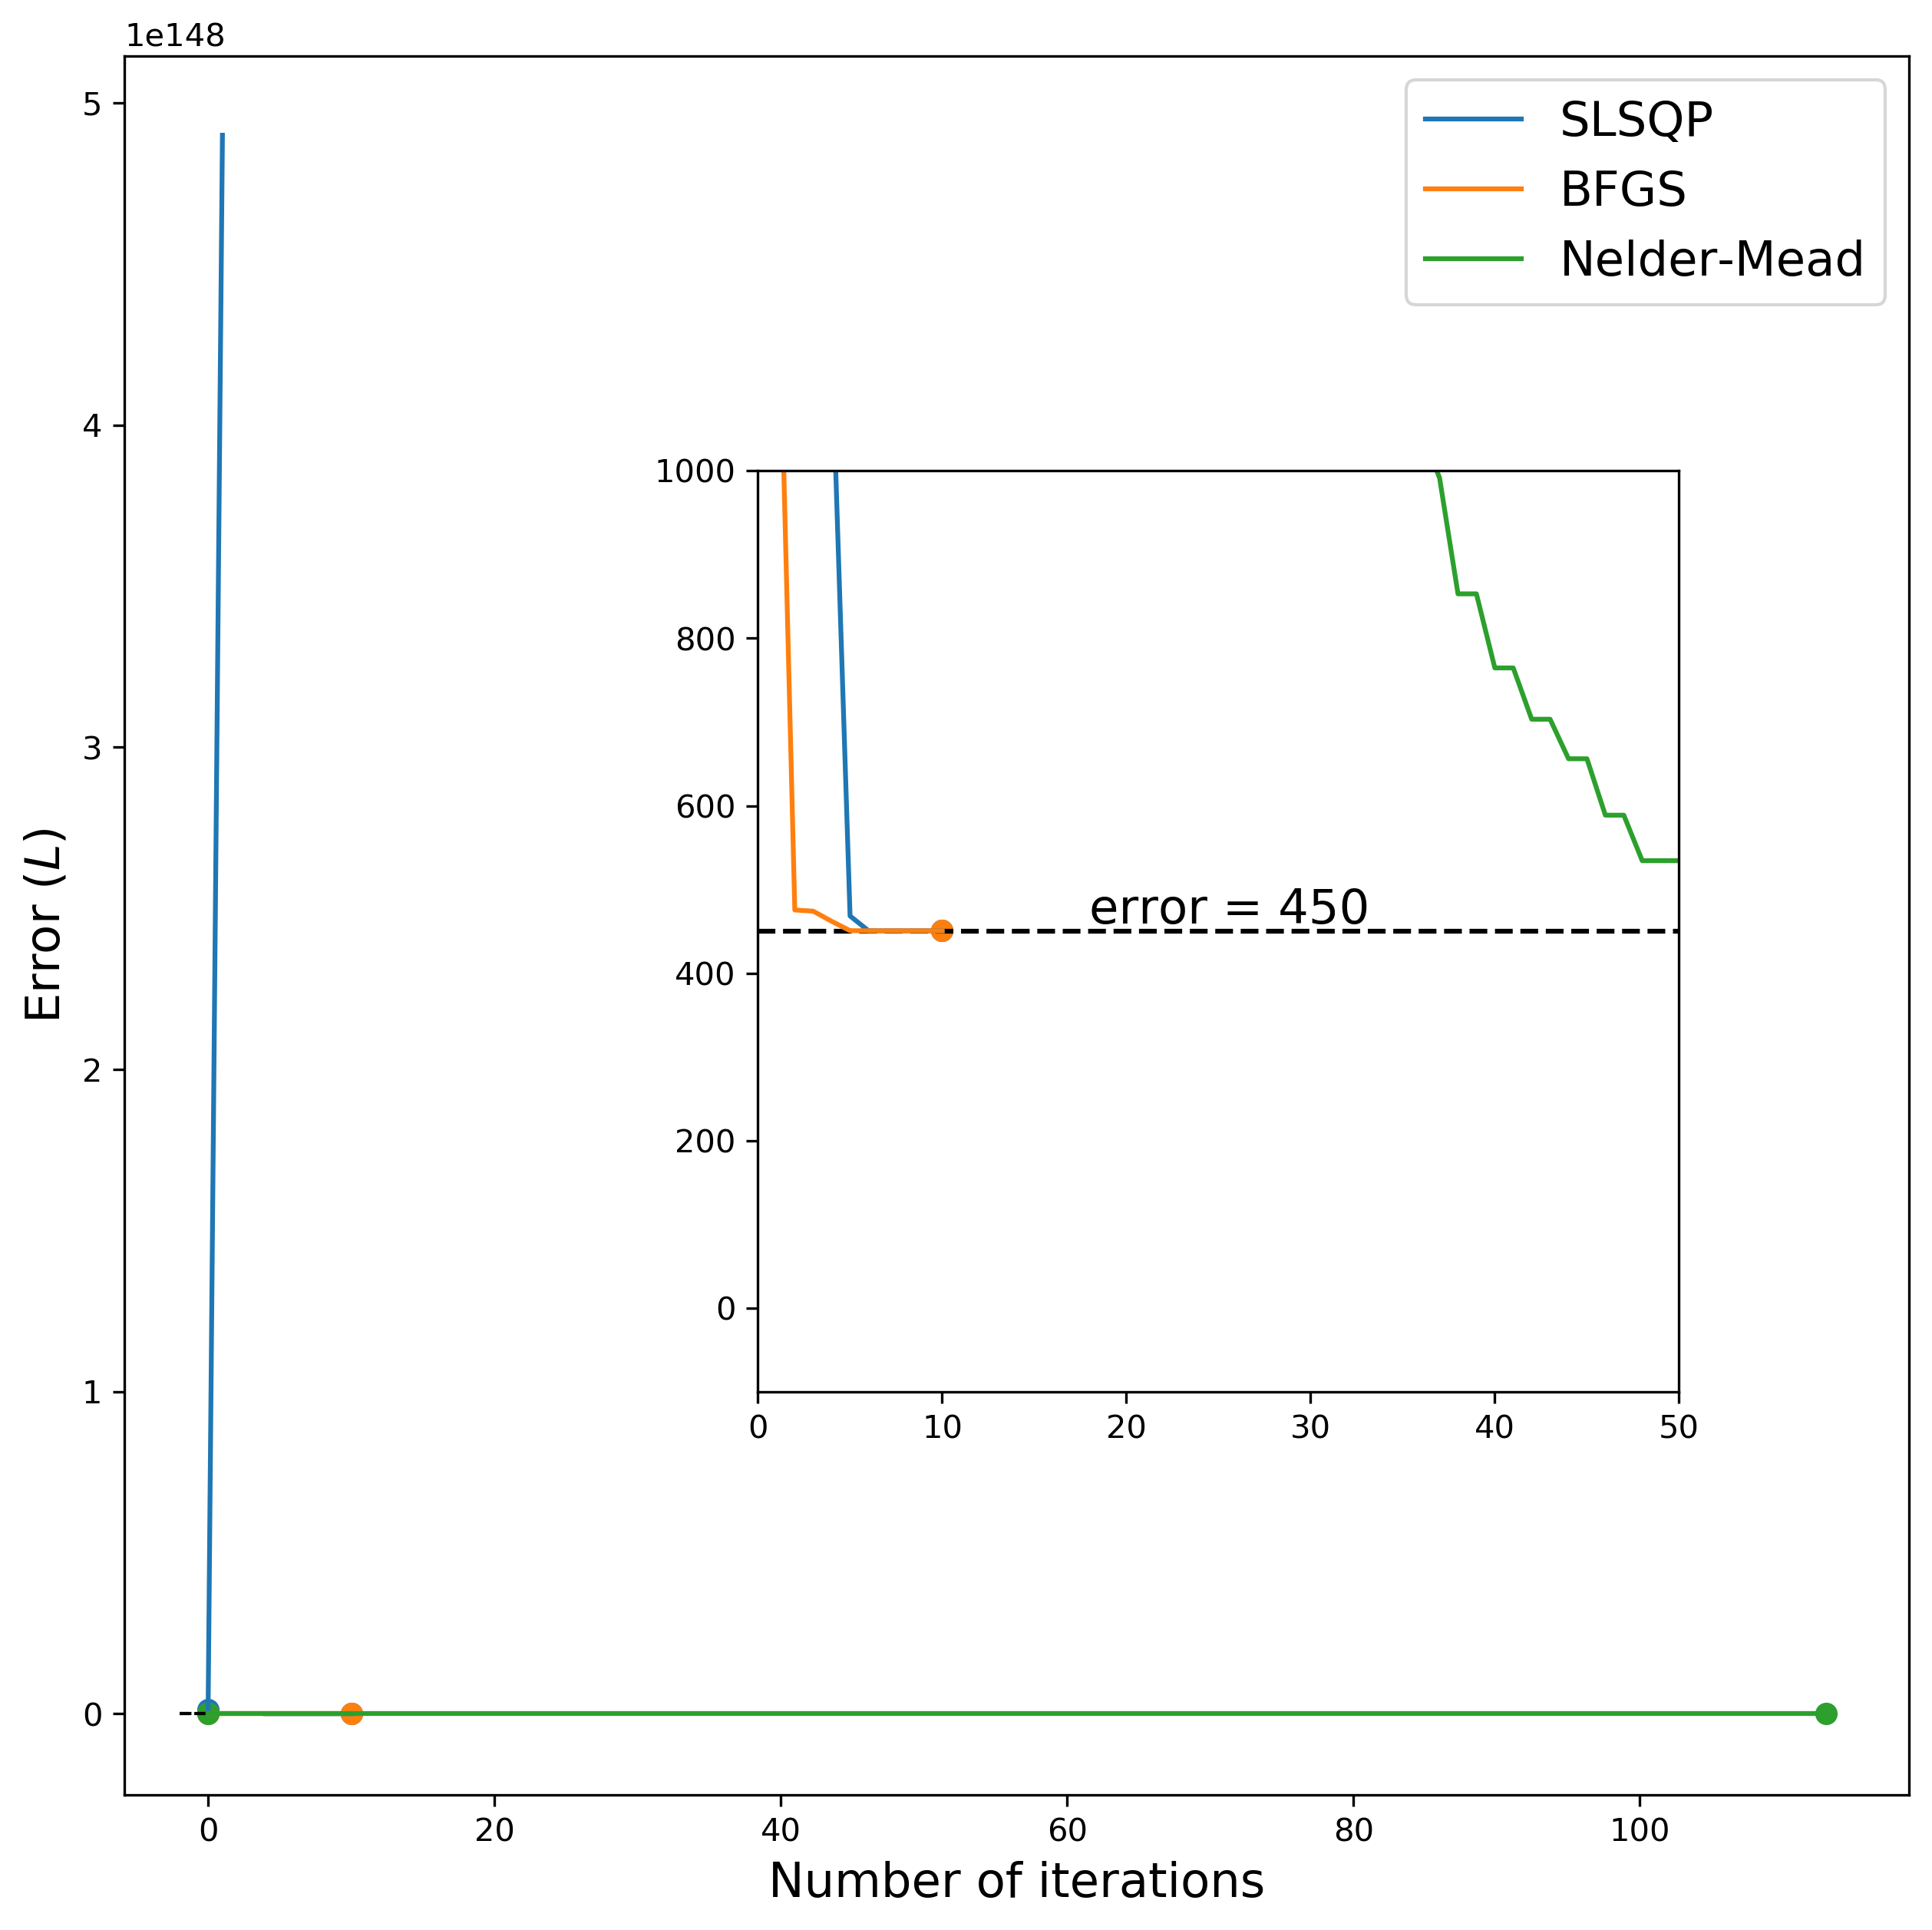

In [67]:
fig, ax1 = plt.subplots(figsize=(10,10), dpi=300)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.4, 0.3, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])


for alg in err_:
    ax1.plot(err_[alg], label = alg)
    ax1.scatter([0, len(err_[alg])-1], [err_[alg][0], err_[alg][-1]])
ax1.legend(prop={'size': 15})
ax1.set_xlabel('Number of iterations',fontsize=15)
ax1.set_ylabel('Error ($L$)', fontsize=15)

for alg in err_:
    ax2.plot(err_[alg], label = alg)
    ax2.scatter([0, len(err_[alg])-1], [err_[alg][0], err_[alg][-1]])

ax2.hlines(450, 0, 50, colors='k', linestyles='--')
ax2.set_ylim(-100, 1000)
ax2.set_xlim(0, 50)
ax2.text(18, 460, 'error = 450',fontsize=15)
# plt.axis('off')
# ax2.set_xticks([])
# ax2.set_yticks([])

rect = patches.Rectangle((-2,-3000),40,10000,linewidth=1, linestyle='--', edgecolor='k',facecolor='none')
ax1.add_patch(rect)


plt.show()

## Comparative plot
Compare the three fitting curves:
- func1 : $$y = 48.42\,e^{-1.46\,x} + 3.76\,x$$ 
- func2 : $$y = 45.25 e^{-x} + 0.5 x^2$$
- func3 : $$y = 3.78\,e^{0.26\,x} + {3.97}/{x}$$


<h3> Compare curves

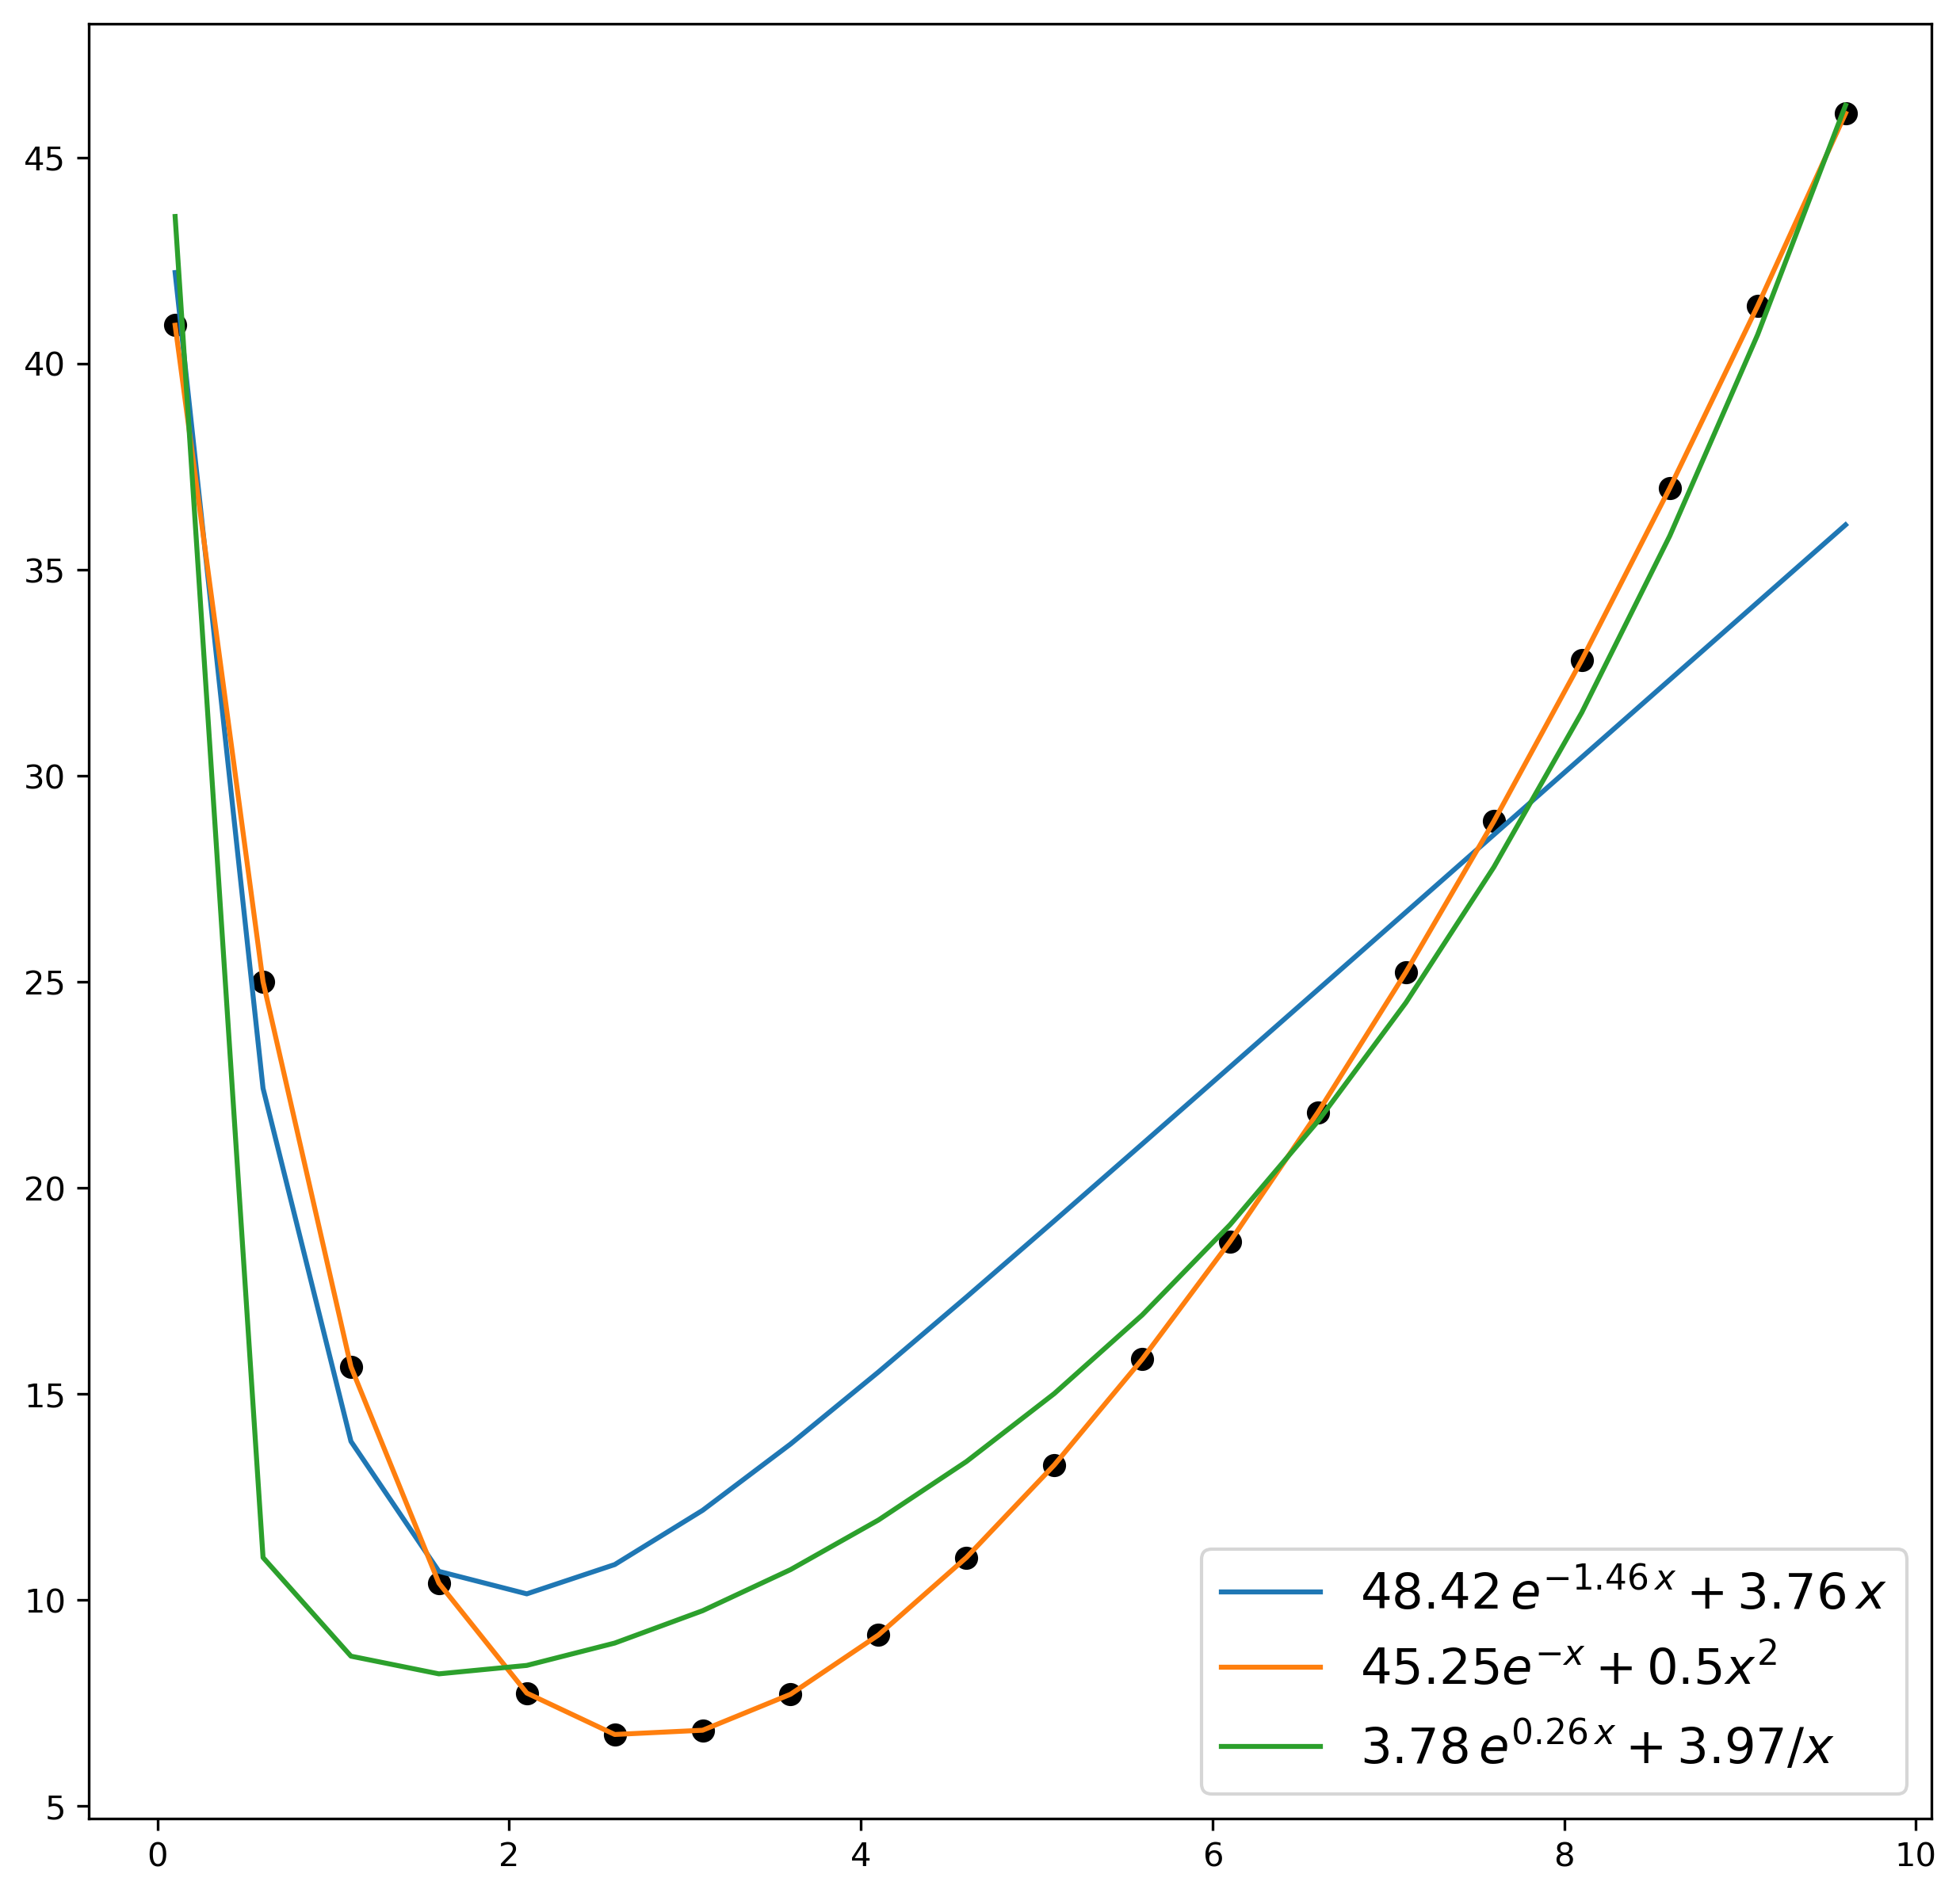

In [40]:
k1 = [48.42, -1.46, 3.76]
k2 = [45.24, -1.0, .5]
k3 = [3.78, .26, 3.97]

plt.figure(dpi=300, figsize=(10,10))

plt.plot(x, func1(k1), label='$48.42\,e^{-1.46\,x} + 3.76\,x$')
plt.plot(x, func2(k2), label='$45.25 e^{-x} + 0.5 x^2$')
plt.plot(x, func3(k3), label='$3.78\,e^{0.26\,x} + {3.97}/{x}$')
plt.scatter(x, y, color='k')
plt.legend(prop={'size': 15})

plt.show()

<h3> Compare error

In [93]:
#SLSQP
k0_SLSQP = [
    [ 9.00880747, -9.46343346,  5.51256852],
    [ 2.26403939, -9.21597011, 1.25694655],
    [ 5.02618921, -0.03158326, 0.41575531]
]

#BFGS
k0_BFGS = [
    [-0.49004028, -5.00095309, -7.72165907],
    [-2.83861041, -8.35400871,  1.72642177],
    [ 5.02618921, -0.03158326, 0.41575531]
]

alg_mtds = ['SLSQP', 'BFGS']
k0_  = {'SLSQP' : k0_SLSQP, 'BFGS'  : k0_BFGS}
functions = [func1, func2, func3]

memory = defaultdict(list)

for alg in alg_mtds:
    for i, func in enumerate(functions):
        ALGO = '%s_func%d'%(alg,i+1)
        error = lambda k: loss(k, func)
        k0 = k0_[alg][i]

        res = minimize(error, k0, method=alg, options=opts, callback=callback_fun)
        print (ALGO)
        print(res)
        print()

SLSQP_func1
     fun: 450.64223065616056
     jac: array([-0.00028229, -0.00691223, -0.02720261])
 message: 'Optimization terminated successfully.'
    nfev: 67
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([48.41839405, -1.46114077,  3.76201116])

SLSQP_func2
     fun: 1.2167003384251833e-07
     jac: array([ 0.00055799,  0.01563798, -0.06163405])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([45.24194533, -0.99999212,  0.49999902])

SLSQP_func3
     fun: 301.69826452762277
     jac: array([0.00123978, 0.03087234, 0.00052643])
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([3.78280377, 0.26083358, 3.97191269])

BFGS_func1
      fun: 450.64223034806673
 hess_inv: array([[ 7.80814890e-01, -2.61464585e-02,  7.44065953e-03],
       [-2.61464585e-02,  2.17331487e-03, -6.33704963e-04],
       [ 7.44065

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


In [97]:
err_ = defaultdict(list)

for alg in alg_mtds:
    for i, func in enumerate(functions):
        ALGO = '%s_func%d'%(alg,i+1)
        print (alg, " : iterations = ",len(memory[ALGO]))
        error = lambda k: loss(k, func)

        for xk in memory[ALGO]:
            err_[ALGO].append(error(xk))

# for func, alg in zip(functions, memory):
#     print (alg, " : iterations = ",len(memory[alg]))
#     error = lambda k: loss(k, func)
    
#     for xk in memory[alg]:
#         err_[alg].append(error(xk))

SLSQP  : iterations =  11
SLSQP  : iterations =  9
SLSQP  : iterations =  14
BFGS  : iterations =  13
BFGS  : iterations =  10
BFGS  : iterations =  12


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


In [100]:
scatter_discont = {}

for alg in err_:
    scatter_discont[alg] = []
    for i in range(len(err_[alg])):
        print (i, err_[alg][i])
        if np.isinf(err_[alg][i]):
            scatter_discont[alg].append(i)
        

print("inf points =", scatter_discont)

0 1.3275507173002685e+146
1 4.9006338082181997e+148
2 inf
3 inf
4 1151.3904091383963
5 468.36661021423276
6 450.74105909519517
7 450.6475710039137
8 450.6423186432341
9 450.64223065616056
10 450.64223065616056
0 114682530502790.5
1 489.60931049275877
2 inf
3 837.8559428087206
4 5.646189718451461
5 0.13945710504045145
6 0.00016544547622537572
7 1.2167003384251833e-07
8 1.2167003384251833e-07
0 inf
1 inf
2 9.716218813996999e+95
3 325536.6638757672
4 2.9049235603129846e+45
5 326.7687304297633
6 311.5640644846576
7 307.969161136224
8 302.72728136048886
9 301.8249876660688
10 301.69940649745723
11 301.698265804436
12 301.69826452762277
13 301.69826452762277
0 29695.670176959735
1 1353.5610829031602
2 475.5168457589857
3 474.1550070156809
4 462.3678577184842
5 450.7412692296099
6 450.6469794433069
7 450.64223349862965
8 450.64223034903637
9 450.64223034806696
10 450.64223034806685
11 450.6422303480668
12 450.64223034806673
0 4409.747742700099
1 2270.017063902599
2 32.36777728867832
3 32.2437

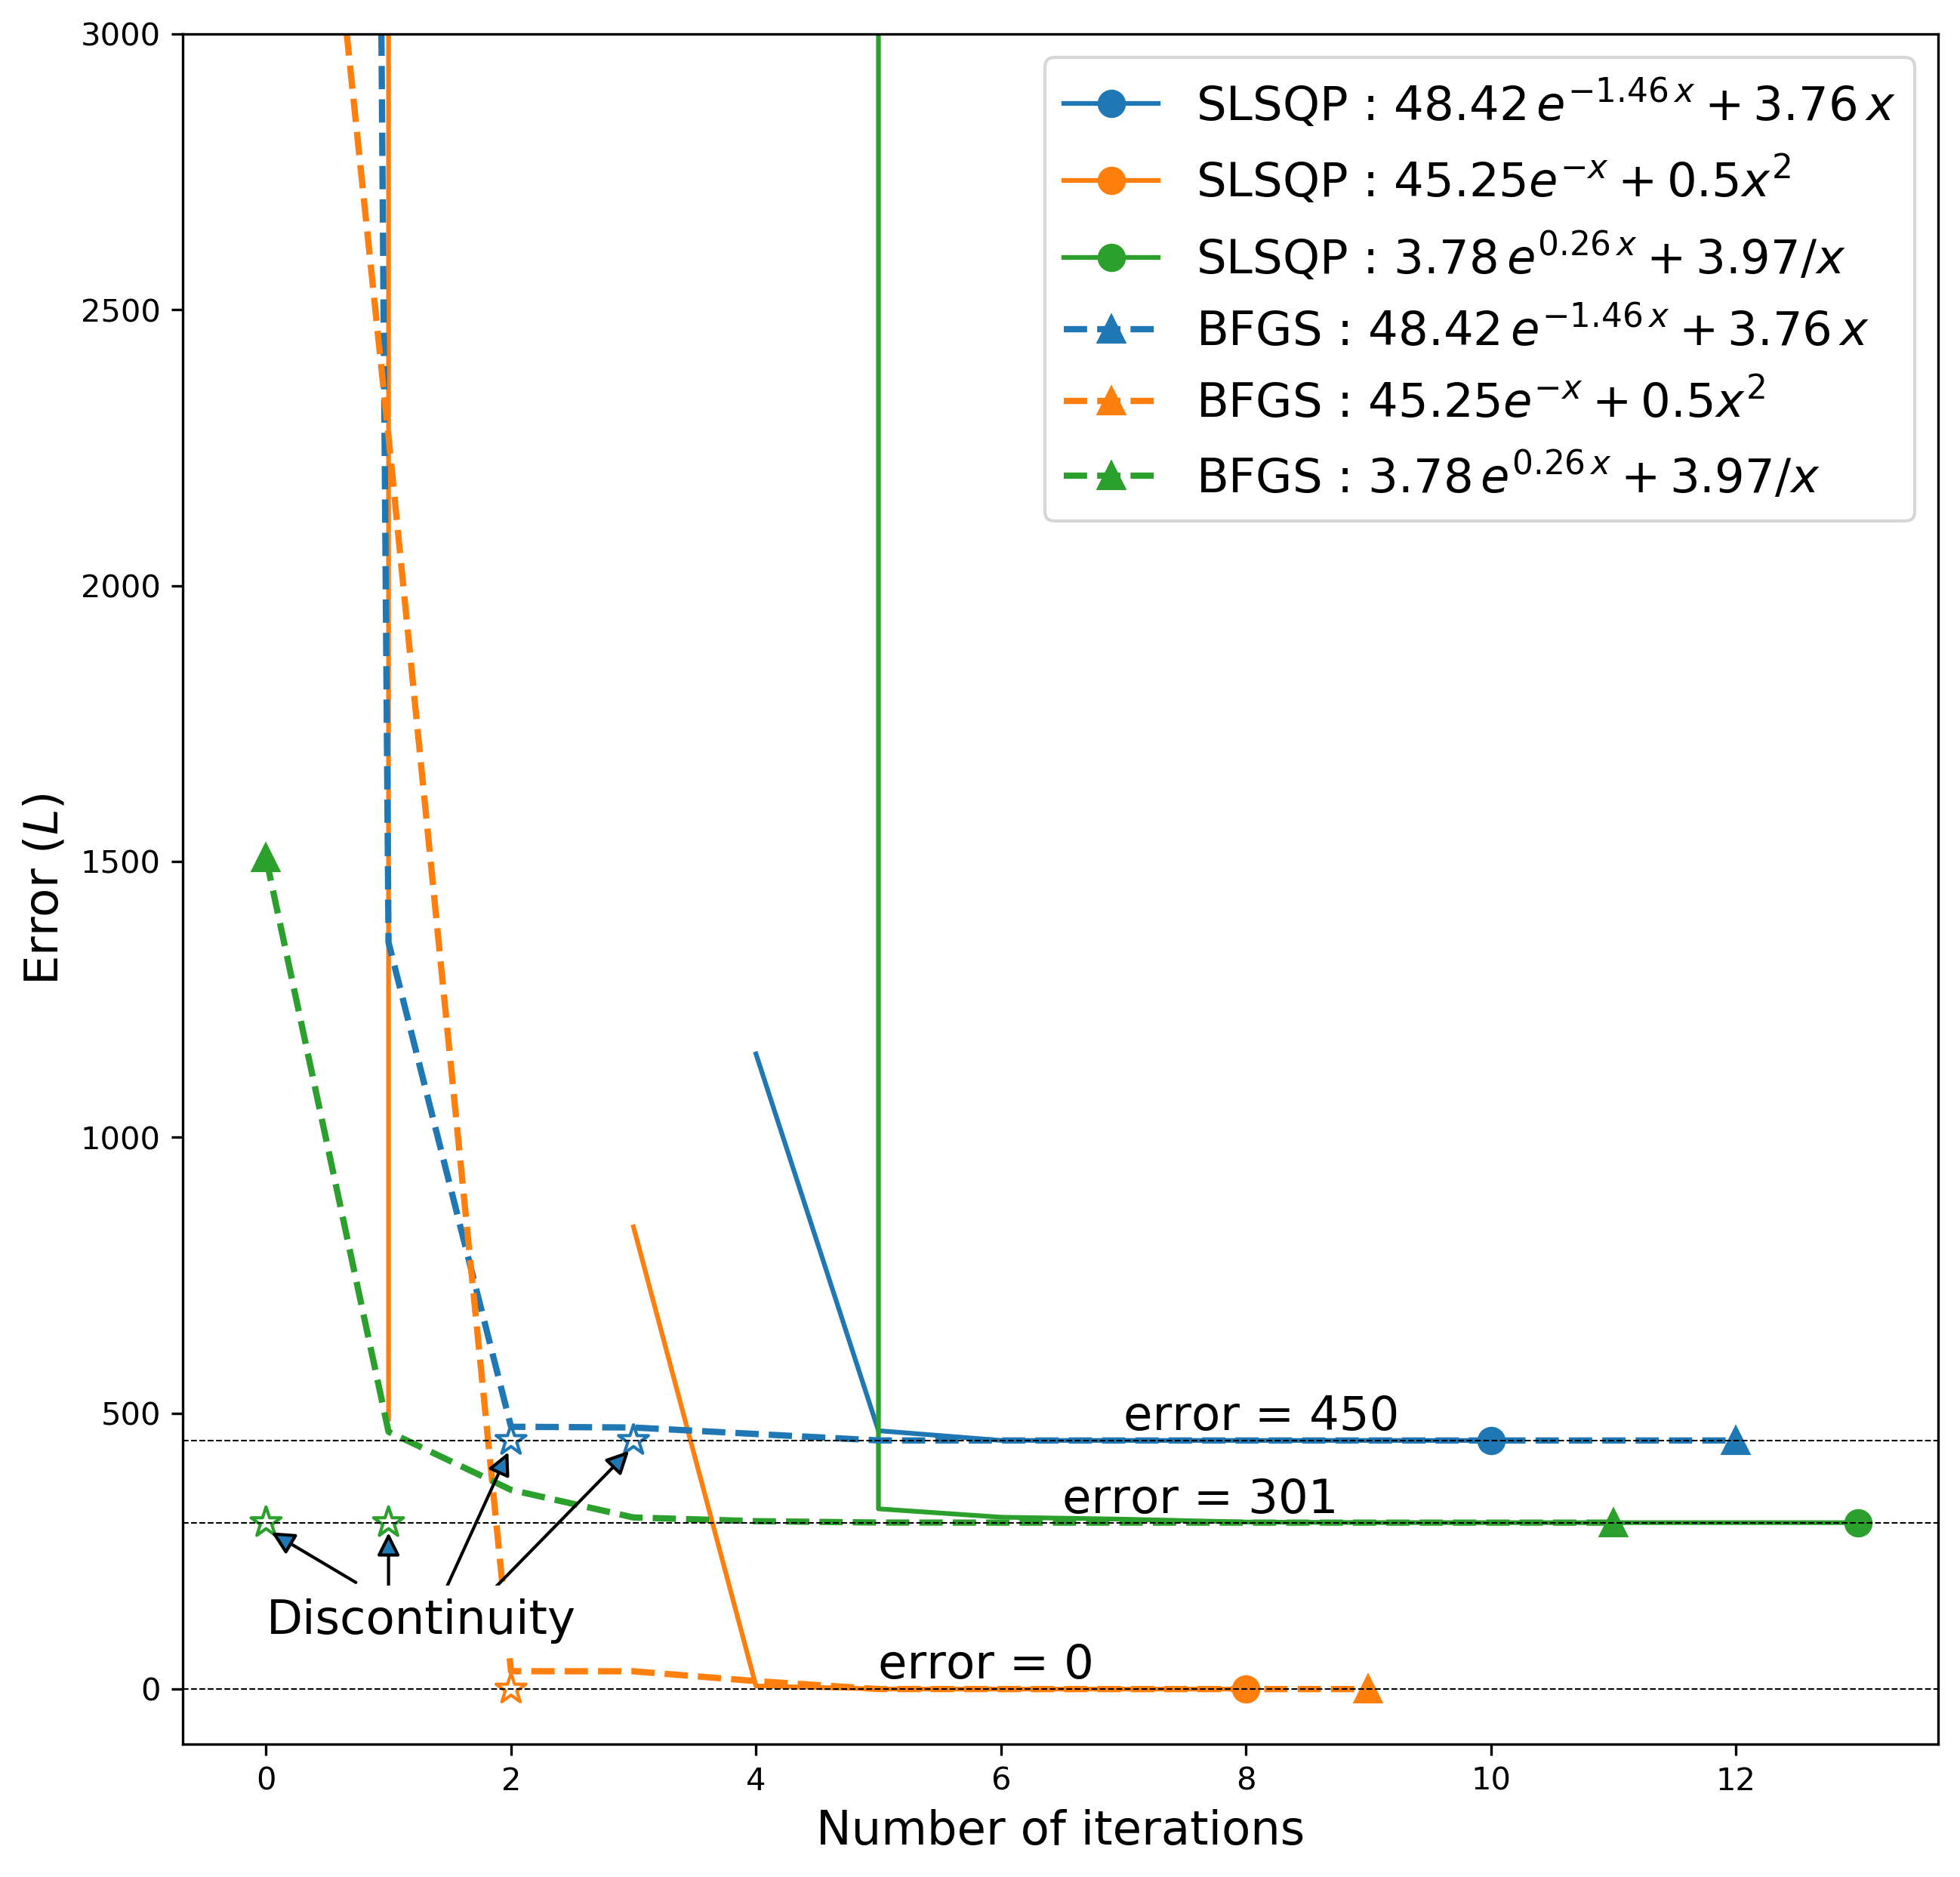

In [161]:
labels = [
    '$48.42\,e^{-1.46\,x} + 3.76\,x$',
    '$45.25 e^{-x} + 0.5 x^2$',
    '$3.78\,e^{0.26\,x} + {3.97}/{x}$'
]

labels_ = ['%s : %s'%(algo, lab) for algo in alg_mtds  for lab in labels ]
ls = ['-', '--']
mark = ['o', '^']
lw = [1.5, 2]

fig, ax1 = plt.subplots(figsize=(10,10), dpi=300)


for i, alg in enumerate(err_):
    ax1.plot(err_[alg], label = labels_[i], color='C%d'%(i%3), linestyle = ls[i//3], marker = mark[i//3], markevery=[0, -1], linewidth=lw[i//3], markersize=8)
#     ax1.scatter([0, len(err_[alg])-1], [err_[alg][0], err_[alg][-1]],  color='C%d'%(i%3), )
    ax1.scatter(scatter_discont[alg], np.array(scatter_discont[alg]) * 0 + err_[alg][-1], color='C%d'%(i%3), facecolors='none', marker =  '*', s=100)

ax1.legend(prop={'size': 15})
ax1.set_xlabel('Number of iterations',fontsize=15)
ax1.set_ylabel('Error ($L$)', fontsize=15)
ax1.set_ylim(-100, 3000)
ax1.axhline(450, color='k', linestyle='--', linewidth=.5)
ax1.axhline(301, color='k', linestyle='--', linewidth=.5)
ax1.axhline(0, color='k', linestyle='--', linewidth=.5)

plt.text(7,470,'error = 450',fontsize = 15)
plt.text(6.5,320,'error = 301',fontsize = 15)
plt.text(5,20,'error = 0',fontsize = 15)

plt.annotate('',
             xy =(1, 295), 
             xytext =(1, 100),
             arrowprops = dict(arrowstyle='-|>'),
             fontsize=15
            )

plt.annotate('',
             xy =(2, 440), 
             xytext =(1.3, 100),
             arrowprops = dict(arrowstyle='-|>'),
             fontsize=15
            )

plt.annotate('',
             xy =(3, 440), 
             xytext =(1.5, 100),
             arrowprops = dict(arrowstyle='-|>'),
             fontsize=15
            )

plt.annotate('Discontinuity',
             xy =(0, 290), 
             xytext =(0, 100),
             bbox=dict(facecolor='white', edgecolor='none'),
             arrowprops = dict(arrowstyle='-|>'),
             fontsize=15
            )




plt.show()